In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madem014","key":"8870ada952d7bd2d8c4ed67cfc7fdb43"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d 'swoyam2609/fresh-and-stale-classification'

100% 2.84G/2.84G [02:23<00:00, 23.6MB/s]
100% 2.84G/2.84G [02:23<00:00, 21.3MB/s]


In [5]:
import zipfile
dataset_zip = zipfile.ZipFile('/content/fresh-and-stale-classification.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()


In [6]:
base_dir = '/content/dataset'


In [7]:
train_dir = '/content/dataset/Train'
test_dir = '/content/dataset/Test'

In [11]:
import os

total_train = 0

for i in os.listdir(train_dir):
  total_train += len(os.listdir(train_dir+'/'+i))
  print('Total File ', i, '=', len(os.listdir(train_dir+'/'+ i)))

print(total_train)

total_test = 0

for i in os.listdir(test_dir):
  total_test += len(os.listdir(test_dir+'/'+i))
  print('Total File ', i, '=', len(os.listdir(test_dir+'/'+ i)))

print(total_test)


total = 0
total = total_train + total_test
print('Total dataset = ', total)

Total File  rottenokra = 338
Total File  rottenoranges = 1595
Total File  freshapples = 2424
Total File  rottenbanana = 2932
Total File  freshbanana = 2468
Total File  rottenapples = 3248
Total File  freshcucumber = 748
Total File  freshoranges = 1466
Total File  freshpotato = 560
Total File  rottenpotato = 843
Total File  rottencucumber = 421
Total File  freshtomato = 1858
Total File  rottentomato = 1825
Total File  freshokra = 635
21361
Total File  rottenokra = 224
Total File  rottenoranges = 403
Total File  freshapples = 791
Total File  rottenbanana = 900
Total File  freshbanana = 892
Total File  rottenapples = 988
Total File  freshcucumber = 304
Total File  freshoranges = 388
Total File  freshpotato = 285
Total File  rottenpotato = 420
Total File  rottencucumber = 255
Total File  freshtomato = 255
Total File  rottentomato = 353
Total File  freshokra = 370
6828
Total dataset =  28189


In [9]:
!rm -r /content/dataset/Train/freshbittergroud
!rm -r /content/dataset/Train/rottenbittergroud
!rm -r /content/dataset/Train/freshcapsicum
!rm -r /content/dataset/Train/rottencapsicum
!rm -r /content/dataset/Test/.ipynb_checkpoints

!mv /content/dataset/Test/freshtamto /content/dataset/Test/freshtomato
!mv /content/dataset/Test/freshpatato /content/dataset/Test/freshpotato
!mv /content/dataset/Test/rottenpatato /content/dataset/Test/rottenpotato
!mv /content/dataset/Test/rottentamto /content/dataset/Test/rottentomato


rm: cannot remove '/content/dataset/Test/.ipynb_checkpoints': No such file or directory


In [12]:
os.listdir(train_dir)

['rottenokra',
 'rottenoranges',
 'freshapples',
 'rottenbanana',
 'freshbanana',
 'rottenapples',
 'freshcucumber',
 'freshoranges',
 'freshpotato',
 'rottenpotato',
 'rottencucumber',
 'freshtomato',
 'rottentomato',
 'freshokra']

In [13]:
os.listdir(test_dir)

['rottenokra',
 'rottenoranges',
 'freshapples',
 'rottenbanana',
 'freshbanana',
 'rottenapples',
 'freshcucumber',
 'freshoranges',
 'freshpotato',
 'rottenpotato',
 'rottencucumber',
 'freshtomato',
 'rottentomato',
 'freshokra']

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [15]:
def view_random_image (target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Ukuran gambar : {img.shape}")
  return img

Ukuran gambar : (442, 492, 3)


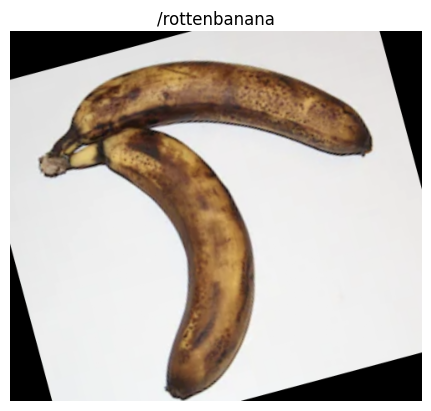

In [16]:
img = view_random_image (train_dir, '/rottenbanana')

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
val_datagen = ImageDataGenerator(
    rescale=1./255,

)

In [19]:
train_data_rf = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 15,
    target_size = (150,150),
    class_mode = "categorical"
)
val_data_rf = val_datagen.flow_from_directory(
    test_dir,
    batch_size = 15,
    target_size = (150,150),
    class_mode = "categorical"
)

Found 21360 images belonging to 14 classes.
Found 6828 images belonging to 14 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(14, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       1

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adamax',   metrics=['accuracy'])

In [22]:
hist = model.fit(
    train_data_rf,
    epochs = 15,
    validation_data=val_data_rf
)

Epoch 1/15
1424/1424 [==============================] - 139s 88ms/step - loss: 0.7265 - accuracy: 0.7422 - val_loss: 0.4570 - val_accuracy: 0.8311
Epoch 2/15
1424/1424 [==============================] - 122s 86ms/step - loss: 0.3486 - accuracy: 0.8699 - val_loss: 0.3593 - val_accuracy: 0.8606
Epoch 3/15
1424/1424 [==============================] - 121s 85ms/step - loss: 0.2557 - accuracy: 0.9029 - val_loss: 0.2793 - val_accuracy: 0.8976
Epoch 4/15
1424/1424 [==============================] - 119s 83ms/step - loss: 0.1919 - accuracy: 0.9286 - val_loss: 0.2550 - val_accuracy: 0.9139
Epoch 5/15
1424/1424 [==============================] - 118s 83ms/step - loss: 0.1469 - accuracy: 0.9447 - val_loss: 0.1846 - val_accuracy: 0.9404
Epoch 6/15
1424/1424 [==============================] - 134s 94ms/step - loss: 0.1144 - accuracy: 0.9590 - val_loss: 0.1971 - val_accuracy: 0.9306
Epoch 7/15
1424/1424 [==============================] - 118s 83ms/step - loss: 0.0916 - accuracy: 0.9669 - val_loss: 0

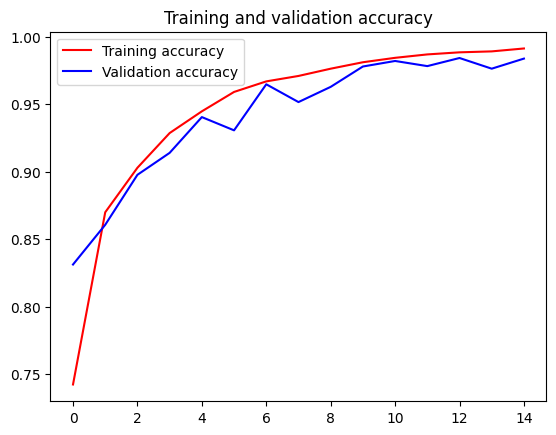

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

# Plot the results
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [62]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x/.255

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)

# Mengambil indeks kelas dengan nilai probabilitas tertinggi
predicted_class_index = np.argmax(arr)

# Daftar label yang sesuai dengan indeks kelas
class_labels = [
    'Fresh Apples', 'Fresh Banana', 'Fresh Cucumber', 'Fresh Okra',
    'Fresh Oranges', 'Fresh Potato', 'Fresh Tomato',
    'Rotten Apples', 'Rotten Banana', 'Rotten Cucumber',
    'Rotten Okra', 'Rotten Oranges', 'Rotten Potato', 'Rotten Tomato'
]

# Menentukan label
predicted_label = class_labels[predicted_class_index]

# Menampilkan hasil prediksi
print('{} is a {}'.format(fn, predicted_label))


Saving FreshOkra2.jpg to FreshOkra2 (10).jpg
1/1 [==============================] - 0s 18ms/step
FreshOkra2 (10).jpg is a Fresh Okra


In [31]:
import keras
from tensorflow.keras.models import save_model

In [32]:
# Calling save('my_model.keras') creates a zip archive my_model.keras.
model.save("mubazirver4.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from google.colab import files
files.download('mubazirver4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>